In [ ]:
import cv2
print(cv2.__version__)

4.1.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
PATH = '/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/농산물 품질(QC) 이미지'

for folder in ['Training_unzip', 'Validation_unzip']:
    total = 0
    fruit_list = os.listdir(PATH+'/'+folder)
    for fruit in fruit_list:
        print(folder, fruit, '이미지 개수:', len(os.listdir(PATH+'/'+folder+'/'+fruit)))
        total += len(os.listdir(PATH+'/'+folder+'/'+fruit))
    
    print(total)

Training_unzip pear_singo 이미지 개수: 5544
Training_unzip persimmon_daebong 이미지 개수: 5544
Training_unzip pear_chuhwang 이미지 개수: 5544
Training_unzip apple_fuji 이미지 개수: 4760
Training_unzip persimmon_bansi 이미지 개수: 7035
Training_unzip mandarine_hallabong 이미지 개수: 5622
Training_unzip apple_yanggwang 이미지 개수: 5544
Training_unzip persimmon_booyu 이미지 개수: 7056
Training_unzip mandarine_onjumilgam 이미지 개수: 5488
52137
Validation_unzip apple_fuji 이미지 개수: 1020
Validation_unzip apple_yanggwang 이미지 개수: 792
Validation_unzip pear_chuhwang 이미지 개수: 792
Validation_unzip mandarine_onjumilgam 이미지 개수: 782
Validation_unzip mandarine_hallabong 이미지 개수: 823
Validation_unzip pear_singo 이미지 개수: 792
Validation_unzip persimmon_bansi 이미지 개수: 1008
Validation_unzip persimmon_booyu 이미지 개수: 1008
Validation_unzip persimmon_daebong 이미지 개수: 792
7809


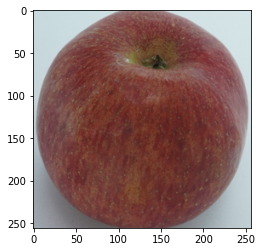

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
test_list = os.listdir(PATH+'/Training_unzip'+'/apple_fuji')
img = Image.open(PATH+'/Training_unzip'+'/apple_fuji/'+test_list[0])
plt.imshow(img)

# Generator 만들기

In [ ]:
import tensorflow
from tensorflow import keras

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13048408213369988295, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1821426494481133612
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [ ]:
train_dir = PATH +'/Training_unzip'
train_dir

'/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/농산물 품질(QC) 이미지/Training_unzip'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    cval=255
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size= 100,
    class_mode='categorical'
)

Found 52137 images belonging to 9 classes.


In [ ]:
validation_dir = PATH +'/Validation_unzip'
validation_dir

'/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/농산물 품질(QC) 이미지/Validation_unzip'

In [ ]:
validation_data = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(256, 256),
    batch_size= 100,
    class_mode='categorical'
)

Found 7809 images belonging to 9 classes.


# 모델 만들기

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())

#model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0

In [ ]:
from tensorflow.keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
             loss=losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [ ]:
#with tf.device('/device:GPU:0'):
history = model.fit_generator(
    train_data,
    steps_per_epoch = 522,
#    epochs=10,
    epochs=1,
    validation_data= validation_data,
    validation_steps=79)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


522/522 [==============================] - 20239s 39s/step - loss: 0.7493 - accuracy: 0.6793 - val_loss: 0.4903 - val_accuracy: 0.7933


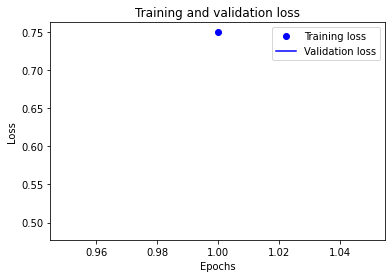

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

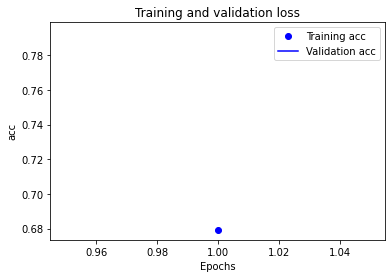

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

#모델 저장

In [ ]:
import os 
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

model.save('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/saved_model/21_08_31_fruit_classification_model_V6')

2.6.0
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/saved_model/21_08_31_fruit_classification_model_V6/assets


#테스트

In [ ]:
train_data

In [ ]:
len(train_data[0])

2

In [ ]:
train_data[0][0][0].shape

(256, 256, 3)

In [ ]:
train_data[0][1][0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
len(train_data[0][1])

100

In [ ]:
len(train_data[0][0])

100

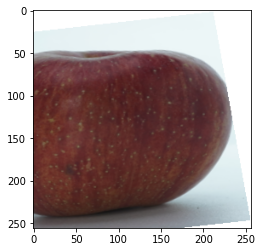

[1. 0. 0. 0. 0. 0. 0. 0. 0.]


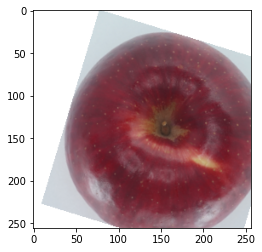

[0. 1. 0. 0. 0. 0. 0. 0. 0.]


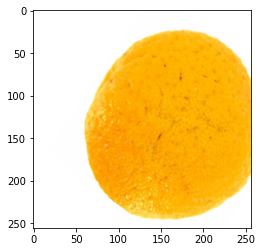

[0. 0. 1. 0. 0. 0. 0. 0. 0.]


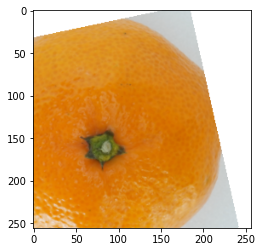

[0. 0. 0. 1. 0. 0. 0. 0. 0.]


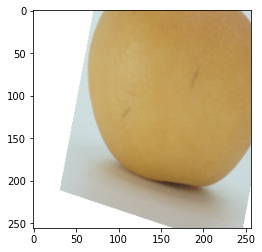

[0. 0. 0. 0. 1. 0. 0. 0. 0.]


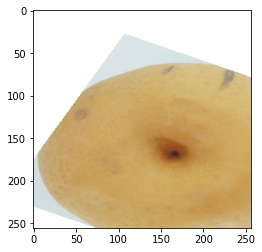

[0. 0. 0. 0. 0. 1. 0. 0. 0.]


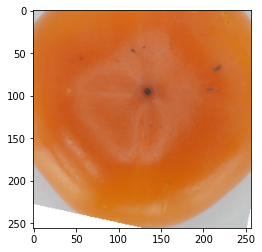

[0. 0. 0. 0. 0. 0. 1. 0. 0.]


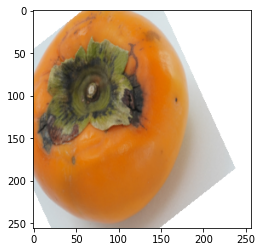

[0. 0. 0. 0. 0. 0. 0. 1. 0.]


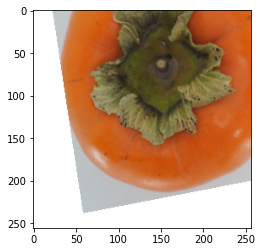

[0. 0. 0. 0. 0. 0. 0. 0. 1.]


IndexError: ignored

In [ ]:
i = 0
while (i<9):
  for idx in range(len(train_data[0][0])):
    if train_data[0][1][idx][i] > 0:
      plt.figure(i)
      imgplot = plt.imshow(train_data[0][0][idx])
      plt.show()
      print(train_data[0][1][idx])
      i += 1

In [ ]:
for i in range(len(test)):
  print(test[i])

#Epoch 2개 추가하기

##모델 불러오기

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/saved_model/21_08_31_fruit_classification_model_V6_epo3')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0

##학습하기

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit_generator(
      train_data,
      steps_per_epoch = 522,
  #    epochs=10,
      epochs=1,
      validation_data= validation_data,
      validation_steps=79)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


391/522 [=====================>........] - ETA: 52:25 - loss: 0.2821 - accuracy: 0.8768

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

##모델저장

In [ ]:
import os 
import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

model.save('/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/data/saved_model/21_08_31_fruit_classification_model_V6_epo4')

In [ ]:
loss, acc = model.evaluate(validation_data, verbose=2)